## Decision Tree

The goal of this project is to train and test a decision tree classifier on 'breast cancer' dataset.

what you should do:
- answere to ‌4 questions, by writing the appropriate code.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

### Reading the "breast cancer" dataset from sklearn

In [ ]:
bcancer = load_breast_cancer()
df = pd.DataFrame(np.c_[bcancer['data'], bcancer['target']],
                  columns= np.append(bcancer['feature_names'], ['target']))
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [ ]:
print('the number of instances in database with cancer is {}'.format(df.loc[df.target==1].shape[0]))
print('the number of instances in database without cancer is {}'.format(df.loc[df.target==0].shape[0]))


the number of instances in database with cancer is 357
the number of instances in database without cancer is 212


Steps we are going to take in this tutorial:

- buiding a decision tree model on "train set":
  - information gain
  - gini index
- testing the model on "test set", and calculating the 1) accuracy, 2) precision and recall, and F-measure
  - holdout
  - cross-validation
- pre-prunning the decision tree by:
  - limiting the deapth of the tree
  - limiting the minimum number of samples required to split an node.

### prepare data:

In [ ]:
y = df['target']
X = df.drop(columns=['target'])


### Holdout method : randomly partition the dataset into two independent sets - train set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### train the decision tree cosidering the "gini index" as the spliting criterion:

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

### using the trained model to predict the class label of the instances in test set, and calculating the accuracy of the model:

In [1]:
from sklearn.metrics import accuracy_score

y_pred_gini = clf_gini.predict(X_test)

print(y_pred_gini[:10])

NameError: name 'clf_gini' is not defined

In [ ]:
gini_acc = accuracy_score(y_test, y_pred_gini)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(gini_acc))

### question 1:
- plot the "confusion matrix",
- calculate "Precision", "Recall", and "F-score"


**gini index tree**

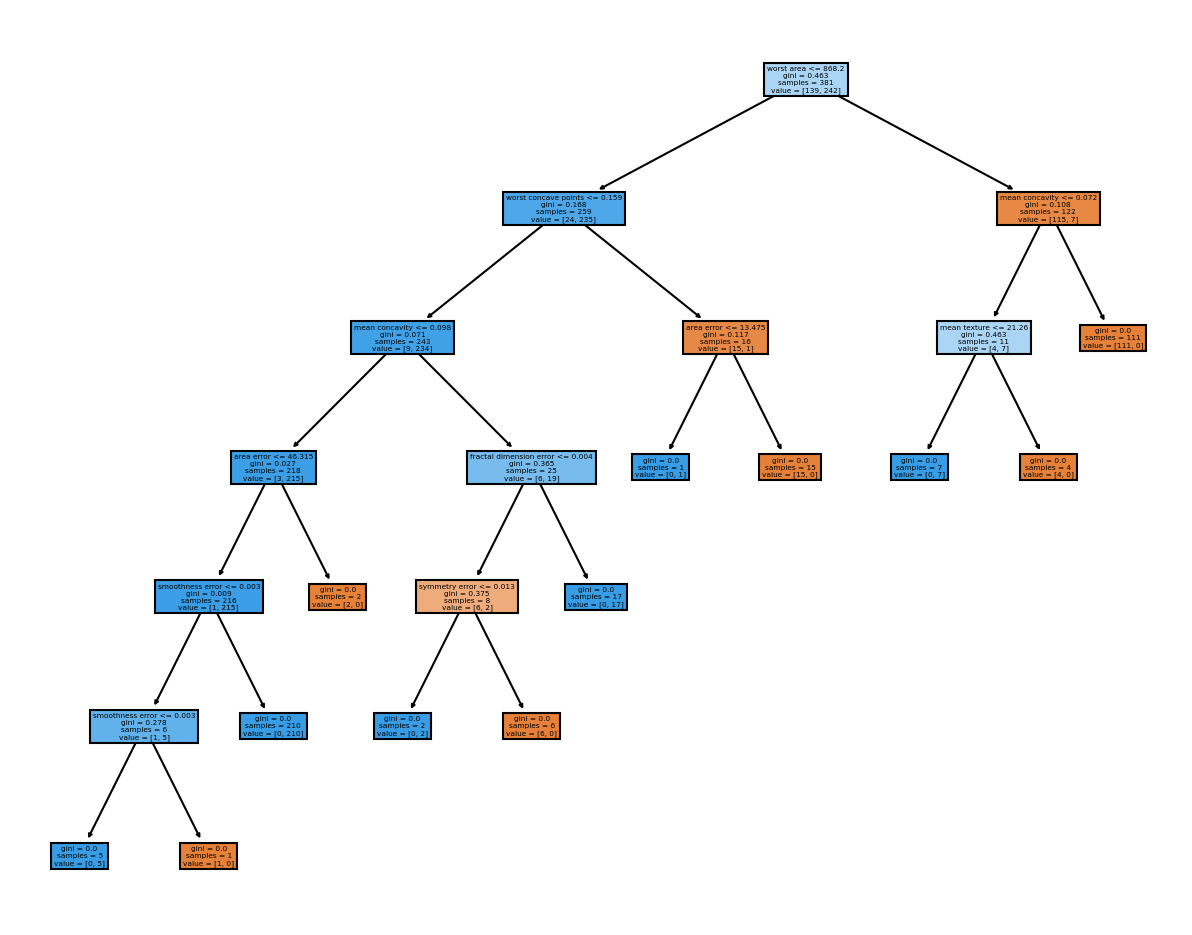

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(clf_gini, feature_names=X.columns, filled=True);

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

**gini accuracy**

In [ ]:
gini_acc = accuracy_score(y_test, y_pred_gini)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(gini_acc))

Model accuracy score with criterion gini index: 0.9043


**gini precision**

In [ ]:
gini_precision = precision_score(y_test, y_pred_gini)
print('Model precision score with criterion gini index: {0:0.4f}'. format(gini_precision))

Model precision score with criterion gini index: 0.9008


**gini Recall**

In [ ]:
gini_recall = recall_score(y_test, y_pred_gini)
print('Model recall score with criterion gini index: {0:0.4f}'. format(gini_recall))

Model recall score with criterion gini index: 0.9478


**gini F-measure**

In [ ]:
gini_f_score = f1_score(y_test, y_pred_gini)
print('Model f-measure score with criterion gini index: {0:0.4f}'. format(gini_f_score))

Model f-measure score with criterion gini index: 0.9237


**Confusion Matrix**

Confusion matrix, without normalization
[[ 60  13]
 [  4 111]]
Normalized confusion matrix
[[0.82191781 0.17808219]
 [0.03478261 0.96521739]]


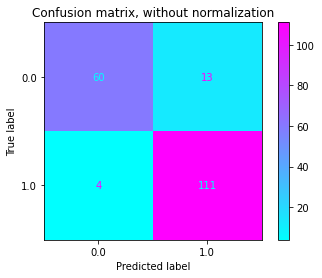

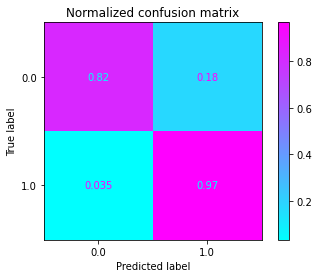

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


classifier = clf_gini.fit(X_train, y_train)

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        cmap=plt.cm.cool,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### plot the decision tree:

[Text(0.6805555555555556, 0.9285714285714286, 'X[23] <= 868.2\ngini = 0.463\nsamples = 381\nvalue = [139, 242]'),
 Text(0.4722222222222222, 0.7857142857142857, 'X[27] <= 0.159\ngini = 0.168\nsamples = 259\nvalue = [24, 235]'),
 Text(0.3333333333333333, 0.6428571428571429, 'X[6] <= 0.098\ngini = 0.071\nsamples = 243\nvalue = [9, 234]'),
 Text(0.2222222222222222, 0.5, 'X[13] <= 46.315\ngini = 0.027\nsamples = 218\nvalue = [3, 215]'),
 Text(0.16666666666666666, 0.35714285714285715, 'X[14] <= 0.003\ngini = 0.009\nsamples = 216\nvalue = [1, 215]'),
 Text(0.1111111111111111, 0.21428571428571427, 'X[21] <= 27.755\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.05555555555555555, 0.07142857142857142, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2222222222222222, 0.21428571428571427, 'gini = 0.0\nsamples = 210\nvalue = [0, 210]'),
 Text(0.2777777777777778, 0.35714285714285715, 'gini = 0.0\ns

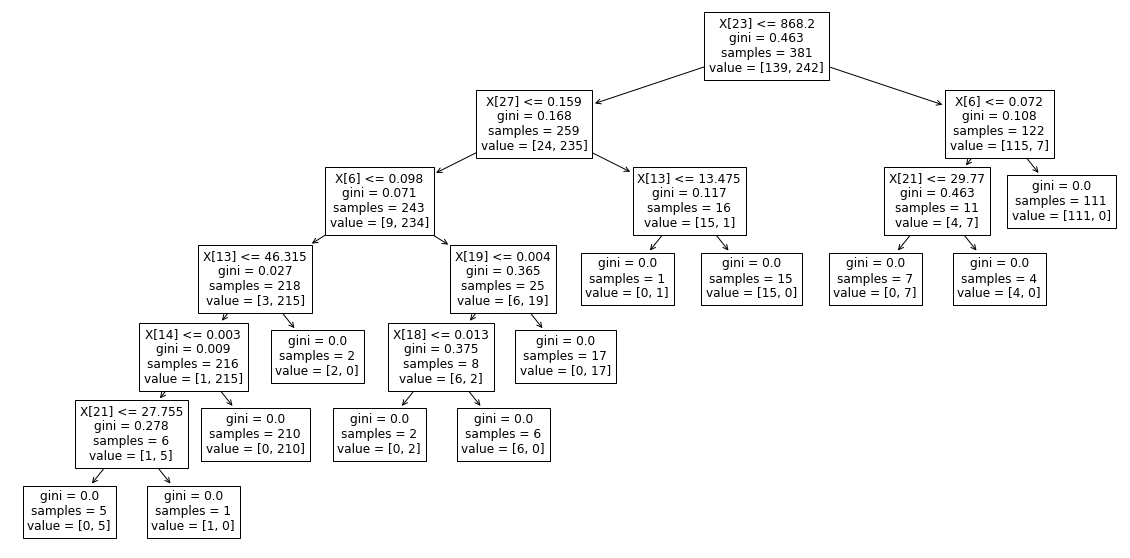

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(clf_gini.fit(X_train, y_train))

### question 2:
- train the model using "information gain"
- test the model and calculate all the measures (accuracy, precision, recall, f-score)
- plot the tree

In [ ]:
# write the code here

from sklearn import tree

clf_entropy = tree.DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf_entropy.score(X, y)

0.9771528998242531

In [ ]:
y_pred_entropy = clf_entropy.predict(X_test)

print(y_pred_entropy[:10])

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Accuracy Score**

acc = (tp+tn) / (tp+tn+fp+fn)

In [ ]:
entropy_acc = accuracy_score(y_test, y_pred_entropy)
print('Model accuracy score with criterion information gain: {0:0.4f}'. format(entropy_acc))

Model accuracy score with criterion information gain: 0.9309


**Precision Score**

precision = tp / tp+fp

In [ ]:
entropy_precision = precision_score(y_test, y_pred_entropy)
print('Model precision score with criterion information gain: {0:0.4f}'. format(entropy_precision))

Model precision score with criterion information gain: 0.9554


**Recall Score**

recall = tp / tp+fn

In [ ]:
entropy_recall = recall_score(y_test, y_pred_entropy)
print('Model recall score with criterion information gain: {0:0.4f}'. format(entropy_recall))

Model recall score with criterion information gain: 0.9304


**F-Score**

f-measure = (2*recall*precision) / (recall+precision)

In [ ]:
entropy_f_measure = f1_score(y_test, y_pred_entropy)
print('Model f-measure score with criterion information gain: {0:0.4f}'. format(entropy_f_measure))

Model f-measure score with criterion information gain: 0.9427


Confusion matrix, without normalization
[[ 64   9]
 [ 11 104]]
Normalized confusion matrix
[[0.87671233 0.12328767]
 [0.09565217 0.90434783]]


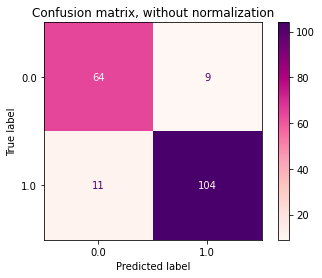

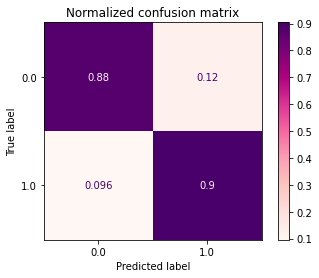

In [ ]:
classifier = clf_entropy.fit(X_train, y_train)

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        cmap=plt.cm.RdPu,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**information gain tree**

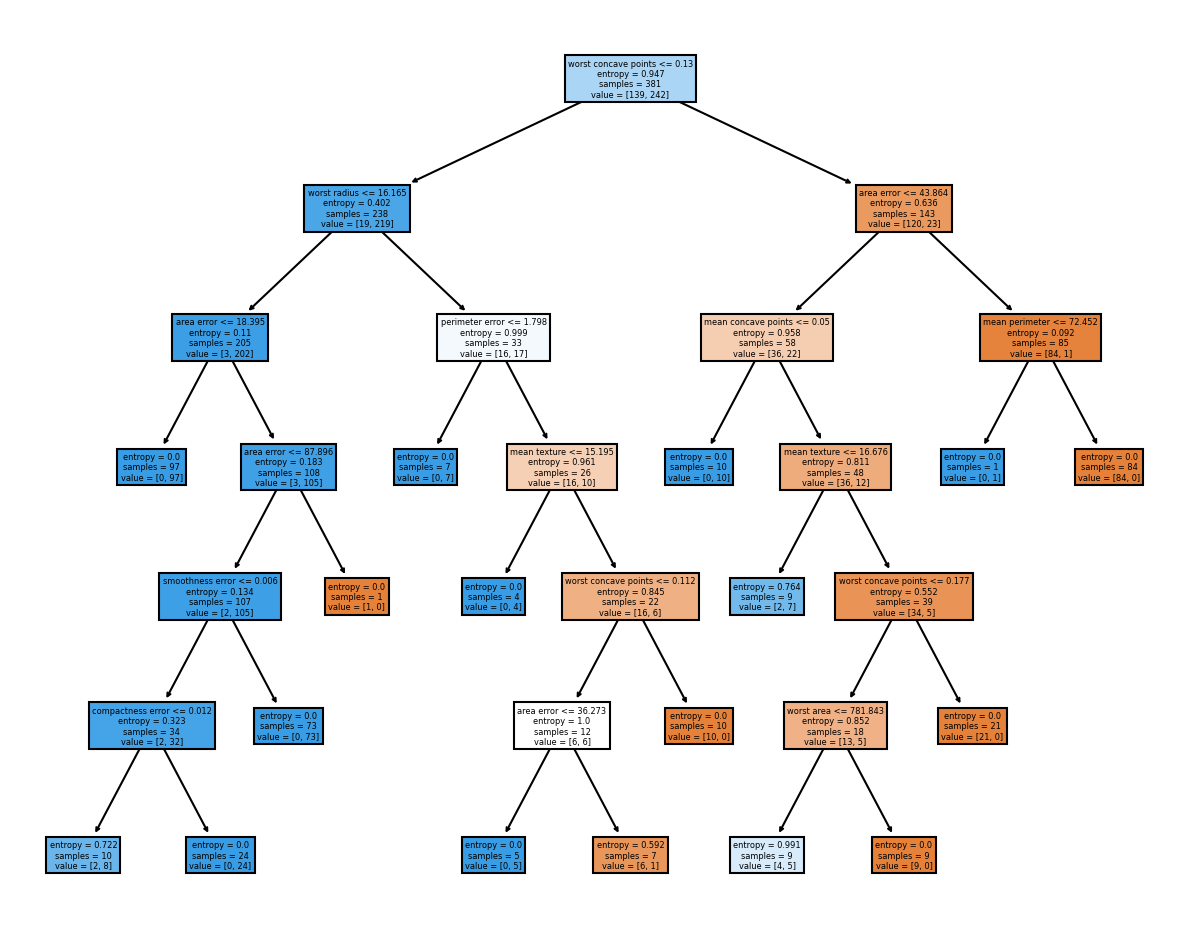

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(clf_entropy, feature_names=X.columns, filled=True);

[Text(0.7282608695652174, 0.9285714285714286, 'X[22] <= 117.45\nentropy = 0.947\nsamples = 381\nvalue = [139, 242]'),
 Text(0.5434782608695652, 0.7857142857142857, 'X[27] <= 0.147\nentropy = 0.513\nsamples = 271\nvalue = [31, 240]'),
 Text(0.391304347826087, 0.6428571428571429, 'X[13] <= 35.435\nentropy = 0.296\nsamples = 249\nvalue = [13, 236]'),
 Text(0.21739130434782608, 0.5, 'X[26] <= 0.401\nentropy = 0.126\nsamples = 232\nvalue = [4, 228]'),
 Text(0.13043478260869565, 0.35714285714285715, 'X[14] <= 0.003\nentropy = 0.041\nsamples = 224\nvalue = [1, 223]'),
 Text(0.08695652173913043, 0.21428571428571427, 'X[27] <= 0.101\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.043478260869565216, 0.07142857142857142, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.13043478260869565, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17391304347826086, 0.21428571428571427, 'entropy = 0.0\nsamples = 218\nvalue = [0, 218]'),
 Text(0.30434782608695654, 0.3

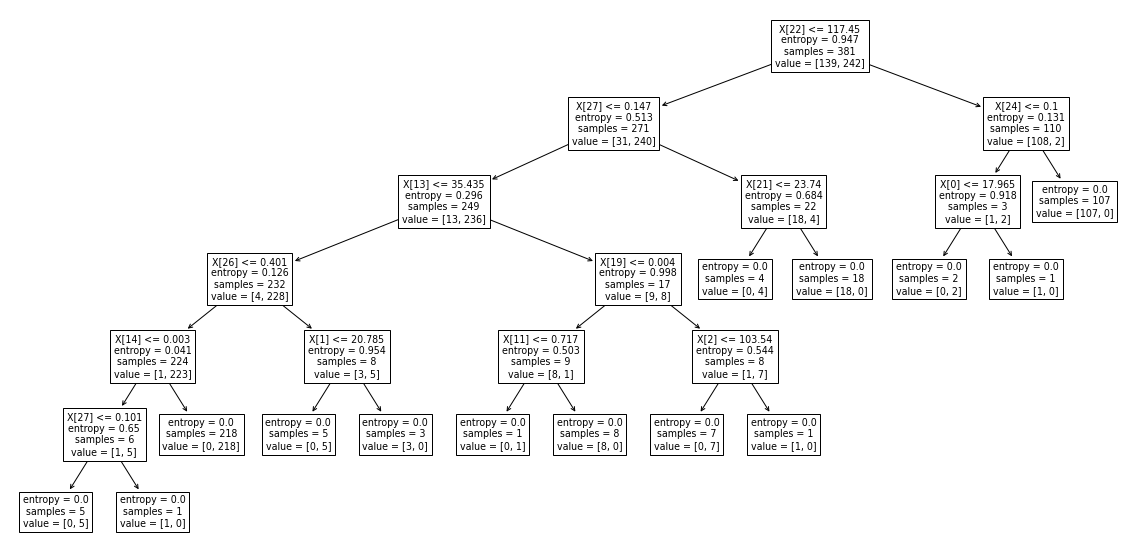

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf_entropy.fit(X_train, y_train))

### question 3: train and test the model using '10-fold cross validation'
- with both considering 'gini index' and 'information gain'


**Information Gain**

In [ ]:
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=10) #create 10-fold
score=cross_val_score(clf_entropy,X,y,cv=kf) #cross validation score

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.92982456 0.9122807  0.94736842 0.98245614 0.9122807  0.94736842
 0.9122807  0.9122807  0.96491228 0.89285714]
Average Cross Validation score :0.9313909774436089


**Gini Index**

In [ ]:

kf=KFold(n_splits=10) #create 10-fold
score=cross_val_score(clf_gini,X,y,cv=kf) #cross validation score

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.92982456 0.89473684 0.92982456 0.9122807  0.9122807  0.94736842
 0.94736842 0.9122807  0.89473684 1.        ]
Average Cross Validation score :0.9280701754385966


### question 4: apply pre-prunning by:
- limiting the deapth of the tree
- limiting the minimum number of samples required to split an node.

**Gini Index**

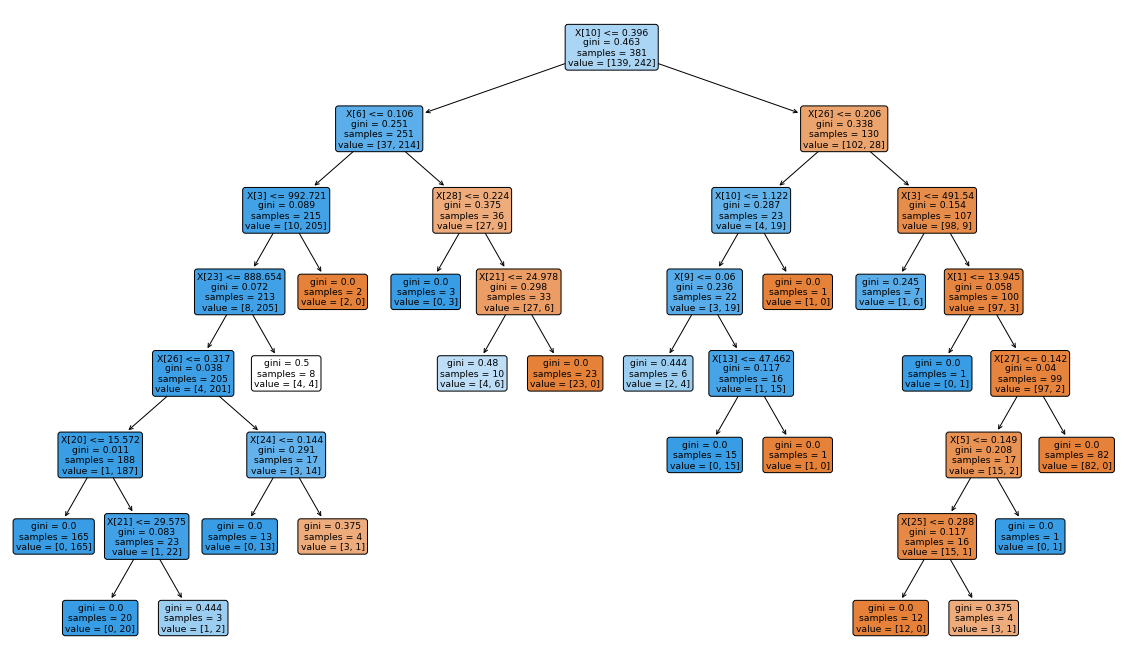

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth= 17,min_samples_split= 12,splitter= 'random')
clf_gini.fit(X_train, y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf_gini,rounded=True,filled=True)
plt.show()

**Informaition Gain**

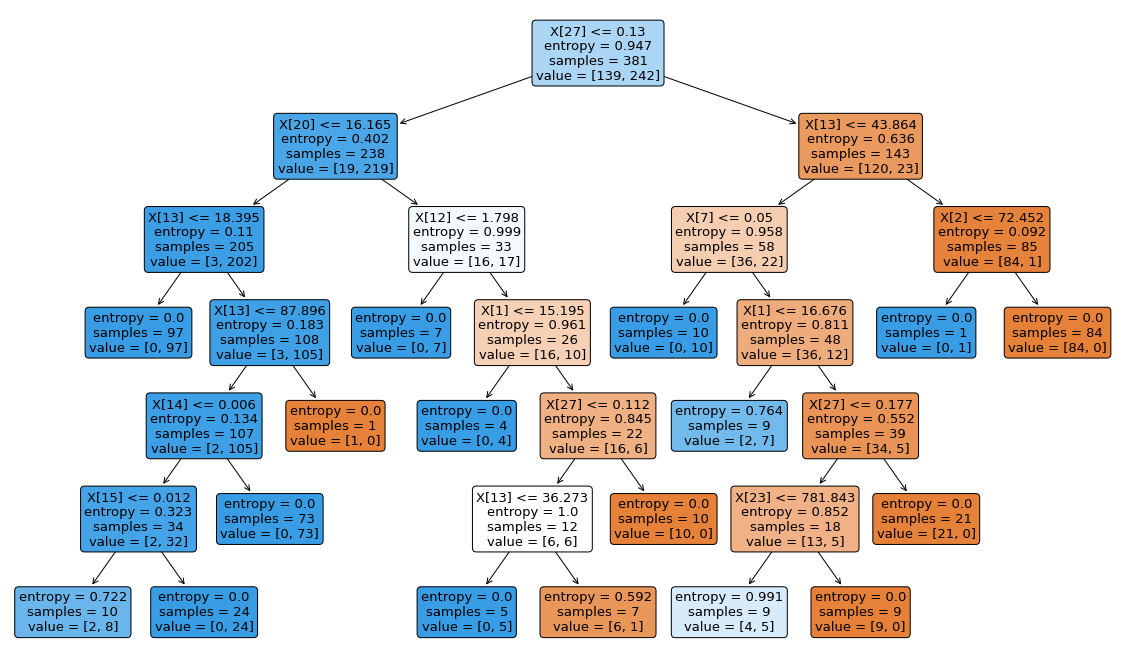

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth= 17,min_samples_split= 12,splitter= 'random')
clf_entropy.fit(X_train, y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf_entropy,rounded=True,filled=True)
plt.show()